In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

## 資料匯入

In [2]:
dflist=[]
for f in os.listdir('data'):
    path = '/Users/wanyuliao/Documents/SideProject/taiwan_box_office_statistic/data/{}'
    df = pd.read_csv(path.format(f))
    dflist.append(df)
len(dflist)

26

In [3]:
movie_all = pd.concat(dflist, axis=0)

## 資料前處理

In [4]:
dt = movie_all[['上映日期', '中文片名', '國別地區', '累計銷售票數', '累計銷售金額']].copy()

In [5]:
dt['上映日期'] = pd.to_datetime(dt['上映日期']) #轉換為日期格式
dt2 = dt[(dt['上映日期'] > '2018-03-23') & (dt['上映日期'] <= '2019-03-23')] #撈出一年內上映的電影
dt3 = dt2.sort_values(['中文片名', '累計銷售金額'], ascending = False) #排序:依'中文片名'、'累計銷售金額'排序

In [6]:
dt3.head()
#dt2.to_csv('dt2.csv') #輸出

,上映日期,中文片名,國別地區,累計銷售票數,累計銷售金額
19,2018-11-23,龐克武士,日本,"1,043","222,743"
5,2018-11-23,龐克武士,日本,981,"209,668"
86,2018-09-21,黃金兄弟,香港,"70,468","15,840,146"
74,2018-09-21,黃金兄弟,香港,"70,428","15,834,546"
79,2018-09-21,黃金兄弟,香港,"70,050","15,790,941"


In [7]:
dt4 = dt3.drop_duplicates(subset = '中文片名', keep = 'last') #去除重複資料並留下'累計銷售金額'較高的列

In [8]:
dt4.head()

,上映日期,中文片名,國別地區,累計銷售票數,累計銷售金額
5,2018-11-23,龐克武士,日本,981,"209,668"
29,2018-09-21,黃金兄弟,香港,"65,731","15,097,533"
29,2018-08-17,黃昏清兵衛,日本,579,"121,075"
44,2018-09-21,麵包超人電影版閃耀吧！庫倫與生命之星,日本,"4,444","1,005,829"
41,2018-09-21,鳥男孩,西班牙,82,"18,330"


In [9]:
dt4['累計銷售票數'] = dt4['累計銷售票數'].apply(lambda x: x.replace(',', '')).astype("int")
dt4['累計銷售金額'] = dt4['累計銷售金額'].apply(lambda x: x.replace(',', '')).astype("float")

/var/folders/xn/cmr1j3fn0kn38hddltd4kh1r0000gn/T/ipykernel_4828/1159370101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt4['累計銷售票數'] = dt4['累計銷售票數'].apply(lambda x: x.replace(',', '')).astype("int")
/var/folders/xn/cmr1j3fn0kn38hddltd4kh1r0000gn/T/ipykernel_4828/1159370101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt4['累計銷售金額'] = dt4['累計銷售金額'].apply(lambda x: x.replace(',', '')).astype("float")


---

## 台灣上映的電影都是來自哪些國家？

In [10]:
import matplotlib as mpl
mpl.rcParams['font.family'] = ['Heiti TC']

In [11]:
country = dt4['國別地區'].value_counts()

In [12]:
country['其他'] = country[country < 10].sum()
country_plt = country[country > 10]

<AxesSubplot: title={'center': '在台灣上映的電影都是來自哪些國家？'}, ylabel='國別地區'>

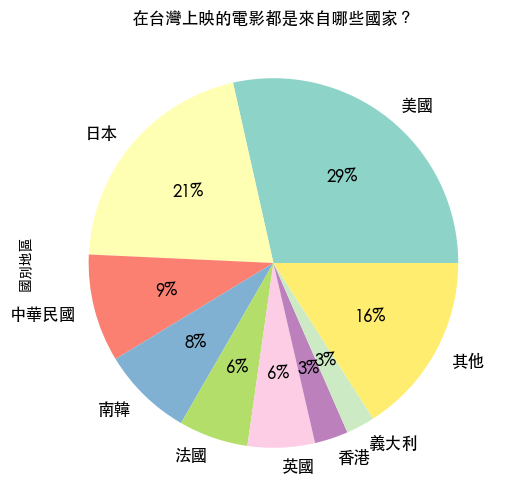

In [13]:
country_plt.plot(kind = 'pie', figsize = (6, 6), title = '在台灣上映的電影都是來自哪些國家？', 
                 autopct = '%1.0f%%', cmap = 'Set3', fontsize = 12)

---

## 過去一年內票房排行前20名的電影

In [14]:
top20movies = dt4.sort_values('累計銷售金額', ascending=False)[:20]

In [15]:
top20movies

,上映日期,中文片名,國別地區,累計銷售票數,累計銷售金額
68,2018-04-25,復仇者聯盟：無限之戰,美國,2595884,641712235.0
58,2018-06-06,侏羅紀世界:殞落國度,美國,2547815,621196489.0
32,2018-08-08,與神同行：最終審判,南韓,1963535,469136454.0
37,2018-07-25,不可能的任務：全面瓦解,美國,1860510,441099147.0
70,2018-03-29,一級玩家,美國,1415734,361830647.0
75,2018-07-04,蟻人與黃蜂女,美國,1260286,296127544.0
66,2018-05-15,死侍2,美國,1228427,287616545.0
8,2018-12-12,水行俠,美國,1124799,274177000.0
51,2018-06-27,超人特攻隊2,美國,1136039,259364967.0
11,2018-10-03,猛毒,美國,958400,223780861.0


---

## 2019過了三個月，目前票房排名前10名的電影

In [16]:
dt5 = dt4[(dt4['上映日期'] > '2019-01-01') & (dt4['上映日期'] <= '2019-03-23')] #撈出今年到目前上映的電影
dt6 = dt5.sort_values(['中文片名'], ascending = False)

In [17]:
dt7 = dt6.drop_duplicates(subset = '中文片名', keep = 'last')

In [18]:
top10in2019 = dt7.sort_values('累計銷售金額', ascending = False)[:10]

In [19]:
top10in2019

,上映日期,中文片名,國別地區,累計銷售票數,累計銷售金額
1,2019-02-05,艾莉塔：戰鬥天使,美國,827011,209920582.0
10,2019-01-30,馴龍高手3,美國,526694,124048377.0
13,2019-01-16,異裂,美國,295523,68702124.0
0,2019-02-22,雞不可失,南韓,219061,50489186.0
16,2019-01-23,寒單,中華民國,128209,28627705.0
4,2019-02-14,祝你忌日快樂,美國,103802,23847629.0
1,2019-02-22,七龍珠‧超布羅利,日本,75611,22826838.0
2,2019-02-27,酷寒殺手,美國,100942,22779934.0
2,2019-02-01,大三元,中華民國,91211,20492889.0
1,2019-02-27,密弑遊戲,美國,78527,17933111.0


---

## 在台灣看一部電影平均要花多少錢？

In [20]:
cost = dt4['累計銷售金額'].sum()
ticket = dt4['累計銷售票數'].sum()
spend = cost/ticket
print(f'在台灣，平均花 {spend:.2f} 元就可以看一部電影！')

在台灣，平均花 236.74 元就可以看一部電影！
